In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns

%matplotlib inline

# 【問題1】データセットの取得

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 【問題2】データセット自体の調査

アイオワ州のエイムズにある住宅価格を79の特徴量より予測するためのデータセット  
「train.csv」は「学習データ」

# 【問題3】データの確認

## 各特徴量を確認
数値データ：float64 :3件  
数値データ：int64 :35件　→　インデックス「Id」および目的変数「SalePrice」を含む  
文字データ：object :43件 

In [3]:
df.info()
#train.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 今回の目的変数はどの列か？
→　SalePrice

## 特徴量の平均値と標準偏差、四分位数を一度に表示

In [4]:
df_attribute = df.iloc[:,1:-1] # 「Id」と「SalePrice」は除外
df_attribute.describe()  # 特徴量の平均値と標準偏差、四分位数を一度に表示

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


# 【問題4】欠損値への対応

## 各特徴量の欠損値の有無を確認

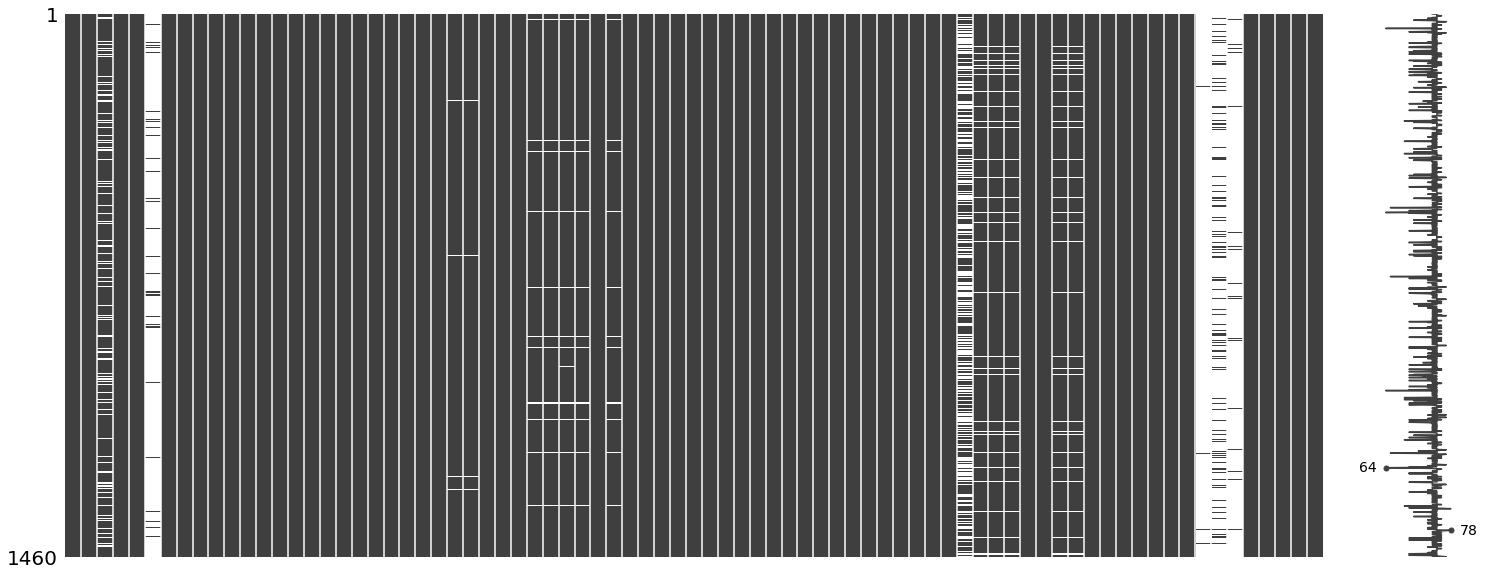

In [5]:
# 欠損値を視覚化
msno.matrix(df_attribute)

## 欠損値が何パーセント含まれるかを確認

In [6]:
ser_missing_sum = df.isnull().sum() # 欠損値の合計を算出
ser_missing_ratio = ser_missing_sum/len(df) # 欠損値の割合を算出
df_missing = pd.concat((ser_missing_sum, ser_missing_ratio),axis=1,sort=False) # 欠損値の合計と割合を結合
df_missing = df_missing.rename(columns={0:'Total',1:'missing_ratio'}) # 列名を変更
df_missing

,Total,missing_ratio
Id,0,0.000000
MSSubClass,0,0.000000
MSZoning,0,0.000000
LotFrontage,259,0.177397
LotArea,0,0.000000
Street,0,0.000000
Alley,1369,0.937671
LotShape,0,0.000000
LandContour,0,0.000000
Utilities,0,0.000000


## 5つ以上欠損値がある特徴量（列）は削除する

In [19]:
ser_missing_sum = df.isnull().sum() #欠損値の合計を算出
tolerance_columns = ser_missing_sum[ser_missing_sum < 5].index # 5つ未満の欠損値がある特徴量の列名を取得
df_preprocessed = df[tolerance_columns] #5つ以上欠損値がある特徴量以外を抽出
df_preprocessed.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       1
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

## 欠損値があるサンプル（行）は削除する

In [9]:
df_preprocessed = df_preprocessed.dropna() # 欠損値が行を削除
df_preprocessed.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
                ..
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageCars       0
GarageArea       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

# 【問題5】用語の調査

## 尖度
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。  
サンプルサイズをn、各データ$n_i(n:1,2,...,n)$の平均値を$\bar{x}$、標準偏差をsとすると尖度は次の式から求められる。  
  
$$
\frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_{i=1}^{n}\frac{(x_i-\bar{x})^4}{s^4}-\frac{3(n-1)^2}{(n-2)(n-3)}
$$

## 歪度
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと  
サンプルサイズをn、各データ$n_i(n:1,2,...,n)$の平均値を$\bar{x}$、標準偏差をsとすると歪度は次の式から求められる。  
  
$$
\frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}\biggl(\frac{x_i-\bar{x}}{s}\biggr)^3
$$

# 【問題6】分布の確認

## seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


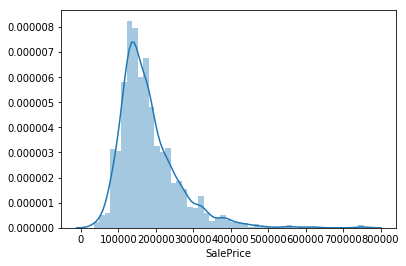

In [22]:
ser_target = df_preprocessed['SalePrice'] #目的変数の「SalePrice」を抽出
sns.distplot(ser_target)

## 尖度と歪度

In [24]:
print("尖度 :", ser_target.kurt())
print("歪度 :", ser_target.skew())

尖度 : 6.536281860064529
歪度 : 1.8828757597682129


## 目的変数に対して対数変換を行う

In [25]:
ser_lt_target = ser_target.apply(np.log)

## 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する

/Users/chidori/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


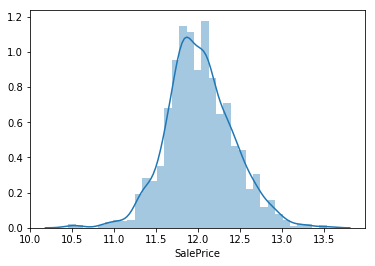

In [26]:
sns.distplot(ser_lt_target)

In [27]:
print("尖度 :", ser_lt_target.kurt())
print("歪度 :", ser_lt_target.skew())

尖度 : 0.8095319958036296
歪度 : 0.12133506220520406


## 対数変換の前の分布
対数変換の前の分布は「正規分布」と比較して非対称の分布となっており「歪度」の値からも右に歪んでいる非対称の分布だと分かる。
また、「尖度」の値も高く「正規分布」と比べて、鋭いピークと長く太い裾を持った分布となっている。  
## 対数変換の後の分布
対数変換の後の分布は「正規分布」に近い対称の分布となっており「歪度」の値も「0」に近くなっている。
また、「尖度」の値も「0」に近くなり「正規分布」に近いピークと裾を持った分布となっている。

# 【問題7】相関係数の確認

## 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける

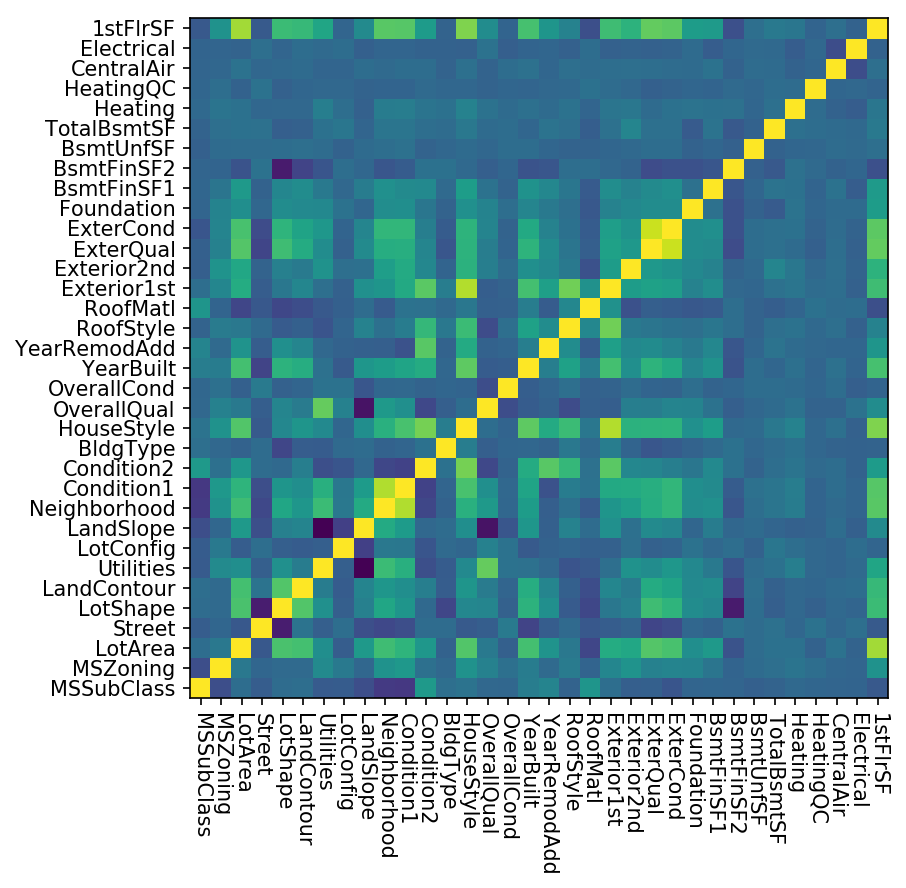

In [68]:
df_preprocessed_columns = df_preprocessed.iloc[0,1:].index # 項目名を取得

df_corr = df_preprocessed.iloc[:,1:].corr(method='pearson')
plt.figure(figsize=(6, 6), dpi=150)
plt.xticks(np.arange(0.5,34.5), df_preprocessed_columns, rotation = -90)
plt.yticks(np.arange(0.5,34.5), df_preprocessed_columns)
plt.pcolor(df_corr)
plt.show()

In [29]:
# 相関係数が高い順位にソートする
df_corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

## 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る

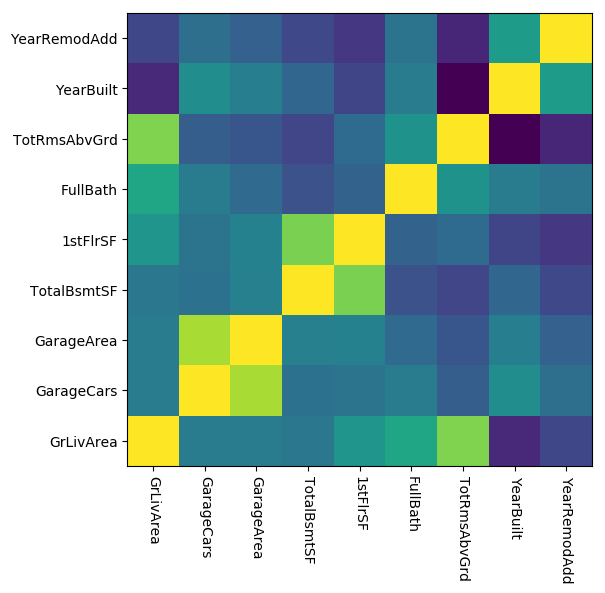

In [69]:
ser_corr_top10 = df_corr['SalePrice'].sort_values(ascending=False)[1:11] # 目的変数との相関の高い特徴量10個を取得
corr_top10_columns_name = ser_corr_top10.index # 目的変数との相関の高い特徴量10個の項目名を取得
df_top10 = df[corr_top10_columns_name] # 目的変数との相関の高い特徴量10個のデータ取得

df_top10_columns = df_top10.iloc[0,1:].index # 項目名を取得

df_corr_top10 = df_top10.iloc[:,1:].corr(method='pearson')
plt.figure(figsize=(6, 6), dpi=100)
plt.xticks(np.arange(0.5, 10.5), df_top10_columns, rotation = -90)
plt.yticks(np.arange(0.5, 10.5), df_top10_columns)
plt.pcolor(df_corr_top10)
plt.show()

## 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる

特徴量（相関係数）
OverallQual (0.790982)：全体的な材料と仕上げの品質
GrLivArea (0.708624)：地上の居住空間（平方フィート）
GarageCars (0.640409)：ガレージのサイズ（車の容量）
GarageArea (0.623431)：ガレージのサイズ（平方フィート）
TotalBsmtSF (0.613581)：地下の合計面積（平方フィート）
1stFlrSF (0.605852)：1階の面積（平方フィート）
FullBath (0.560664)：地上のフルバスルーム数
TotRmsAbvGrd (0.533723)：地上の部屋の合計（バスルームは含まず）
YearBuilt (0.522897)：初回の建築日
YearRemodAdd (0.507101)：改修日

## 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す

In [45]:
# 引数は、相関係数を作成したいdf
def corr(df):
    # 相関係数行列を作成
    corr_mat = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = corr_mat.shape[0]

    # 項目名を取得
    columns = df.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(corr_mat.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary
    df_new["corr"] = corr_ary

    return df_new


corr(df_top10).sort_values('corr',ascending=False)


,var1,var2,corr
5,GarageArea,GarageCars,0.882475
22,TotRmsAbvGrd,GrLivArea,0.825489
14,1stFlrSF,TotalBsmtSF,0.819530
16,FullBath,GrLivArea,0.630012
1,GarageCars,OverallQual,0.600671
0,GrLivArea,OverallQual,0.593007
44,YearRemodAdd,YearBuilt,0.592855
28,YearBuilt,OverallQual,0.572323
11,1stFlrSF,GrLivArea,0.566024
3,GarageArea,OverallQual,0.562022


## 特徴量の中でお互いの相関係数が高い組み合わせ
1. 「GarageArea」と「GarageCars」  
2. 「TotRmsAbvGrd」と「GrLivArea」  
3. 「1stFlrSF」と「TotalBsmtSF」